In [1]:
# necessery libraries
import pandas as pd
import sys
sys.path.insert(0,'../src/utils/')
import general_look_at_data as  GLAD
import cleaning_data as  CLD

In [2]:
# data source must be updated to featsel folder rather than raw
data = pd.read_csv('../data/featsel/Citywide_Survey_featsel.csv')

In [3]:
data.shape

(3346, 156)

# Handle Missing data

In [4]:
# Display missing percentages
feature_missing_stats = GLAD.get_feature_missing(data)
feature_missing_stats

,missing_count,missing_percentage,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,,,
school_park_amount_week,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
work_park_amount_year,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_day,3340,0.998207,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_month,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_year,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
...,...,...,...,...,...,...,...,...
school_bike_park,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_bike,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_taxi,0,0.000000,0.0,0.0,0.0,0.000000,0.998207,int64


## Handle Direct Missing Data

In [5]:
# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

# Display result
direct_missing

,missing_count,missing_percentage
feature,,
school_park_amount_week,3342,0.998805
work_park_amount_year,3342,0.998805
school_park_amount_day,3340,0.998207
school_park_amount_month,3339,0.997908
school_park_amount_year,3339,0.997908
work_park_amount_week,3334,0.996414
work_park_amount_month,3324,0.993425
work_park_amount_day,3322,0.992827
school_cms_zone,3224,0.963539


In [6]:
# Get the list of columns with more than 75% direct missing values
features_gt75_missing = CLD.filter_direct_missing_columns(direct_missing, None, 0.75)

# Display the feature list
features_gt75_missing

['school_park_amount_week',
 'work_park_amount_year',
 'school_park_amount_day',
 'school_park_amount_month',
 'school_park_amount_year',
 'work_park_amount_week',
 'work_park_amount_month',
 'work_park_amount_day',
 'school_cms_zone']

In [7]:
# Delete all features that has more than 75% of direct missing data
CLD.delete_columns(data, features_gt75_missing)

Current number of columns: 156
Updated number of columns: 147


In [8]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

In [9]:
# Get the list of columns with less than 75% direct missing values
features_st75_missing = CLD.filter_direct_missing_columns(direct_missing, None, 0)

# Display the feature list
features_st75_missing

['work_cms_zone']

In [10]:
# Fill in the columns with the column's mod value if the proportion of missing data is less than 75%
CLD.fill_by_mode(data, features_st75_missing)

Provided columns '['work_cms_zone']' successfully filled by mode value.


In [11]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

# Display result
direct_missing

'No Missing Data: NAN type'

In [12]:
# Display final shape from this processing
data.shape

(3346, 147)

# Handle Indirect Missing Data

In [13]:
# Display the indirect missing value for each column with a percentage nonzero.
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,dont_know_percentage,no_response_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,
license,0.0,0.041243,0.000000,0.000000,int64
tnc_purpose,0.0,0.000000,0.000000,0.409444,int64
car_share_none,0.0,0.027197,0.000000,0.000000,int64
car_share_other,0.0,0.027197,0.000000,0.000000,int64
car_share_enterprise,0.0,0.027197,0.000000,0.000000,int64
...,...,...,...,...,...
school_bike_park,0.0,0.000000,0.000000,0.997908,int64
school_mode_bike,0.0,0.000000,0.000000,0.997908,int64
school_mode_taxi,0.0,0.000000,0.000000,0.998207,int64


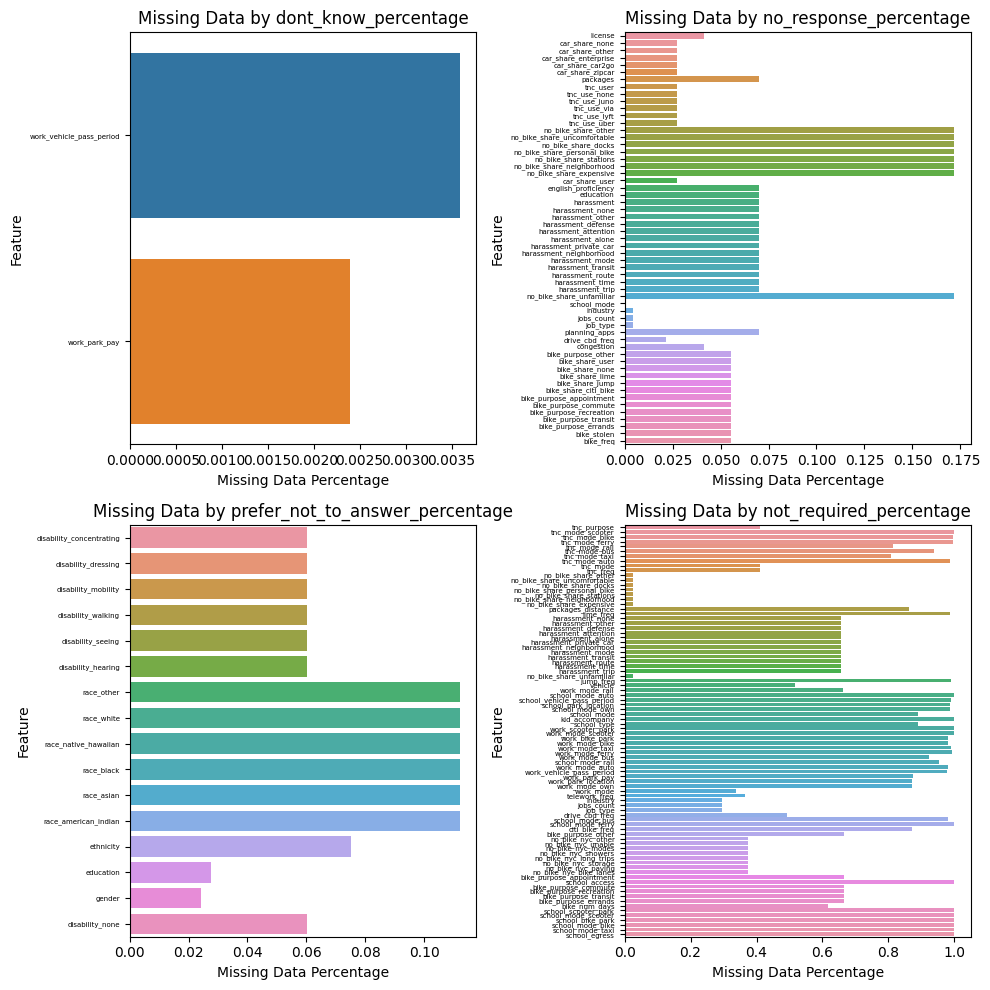

In [14]:
# Generate a visualization of the indirect missing data percentages for each feature
GLAD.plot_indirect_missing(indirect_missing)

I will **delete any features with 60% or more missing data**, regardless of the type of missing data. 

In [15]:
# Get the list of columns with more than 60% indirect missing values
features_gt60_missing = CLD.filter_indirect_missing_columns(indirect_missing, indirect_missing.columns, None, 0.6)

# Display the feature list
features_gt60_missing

c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\notebooks\../src/utils\cleaning_data.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_value = data.max(axis=1)
c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\notebooks\../src/utils\cleaning_data.py:89: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_value = data.min(axis=1)


['tnc_mode_scooter',
 'tnc_mode_bike',
 'tnc_mode_ferry',
 'tnc_mode_rail',
 'tnc_mode_bus',
 'tnc_mode_taxi',
 'tnc_mode_auto',
 'packages_distance',
 'lime_freq',
 'harassment_none',
 'harassment_other',
 'harassment_defense',
 'harassment_attention',
 'harassment_alone',
 'harassment_private_car',
 'harassment_neighborhood',
 'harassment_mode',
 'harassment_transit',
 'harassment_route',
 'harassment_time',
 'harassment_trip',
 'jump_freq',
 'work_mode_rail',
 'school_mode_auto',
 'school_vehicle_pass_period',
 'school_park_location',
 'school_mode_own',
 'school_mode',
 'kid_accompany',
 'school_type',
 'work_scooter_park',
 'work_mode_scooter',
 'work_bike_park',
 'work_mode_bike',
 'work_mode_taxi',
 'work_mode_ferry',
 'work_mode_bus',
 'school_mode_rail',
 'work_mode_auto',
 'work_vehicle_pass_period',
 'work_park_pay',
 'work_park_location',
 'work_mode_own',
 'school_mode_bus',
 'school_mode_ferry',
 'citi_bike_freq',
 'bike_purpose_other',
 'bike_purpose_appointment',
 'scho

In [16]:
# Delete all features that has more than 60% of indirect missing data
CLD.delete_columns(data, features_gt60_missing)

Current number of columns: 147
Updated number of columns: 87


In [17]:
# Update indirect missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Update the indirect missing values
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,no_response_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,
license,0.041243,0.000000,0.0000,int64
gender,0.000000,0.024208,0.0000,int64
tnc_use_juno,0.027496,0.000000,0.0000,int64
tnc_use_none,0.027496,0.000000,0.0000,int64
tnc_user,0.027496,0.000000,0.0000,int64
...,...,...,...,...
no_bike_share_stations,0.171847,0.000000,0.0263,int64
no_bike_share_personal_bike,0.171847,0.000000,0.0263,int64
no_bike_share_docks,0.171847,0.000000,0.0263,int64


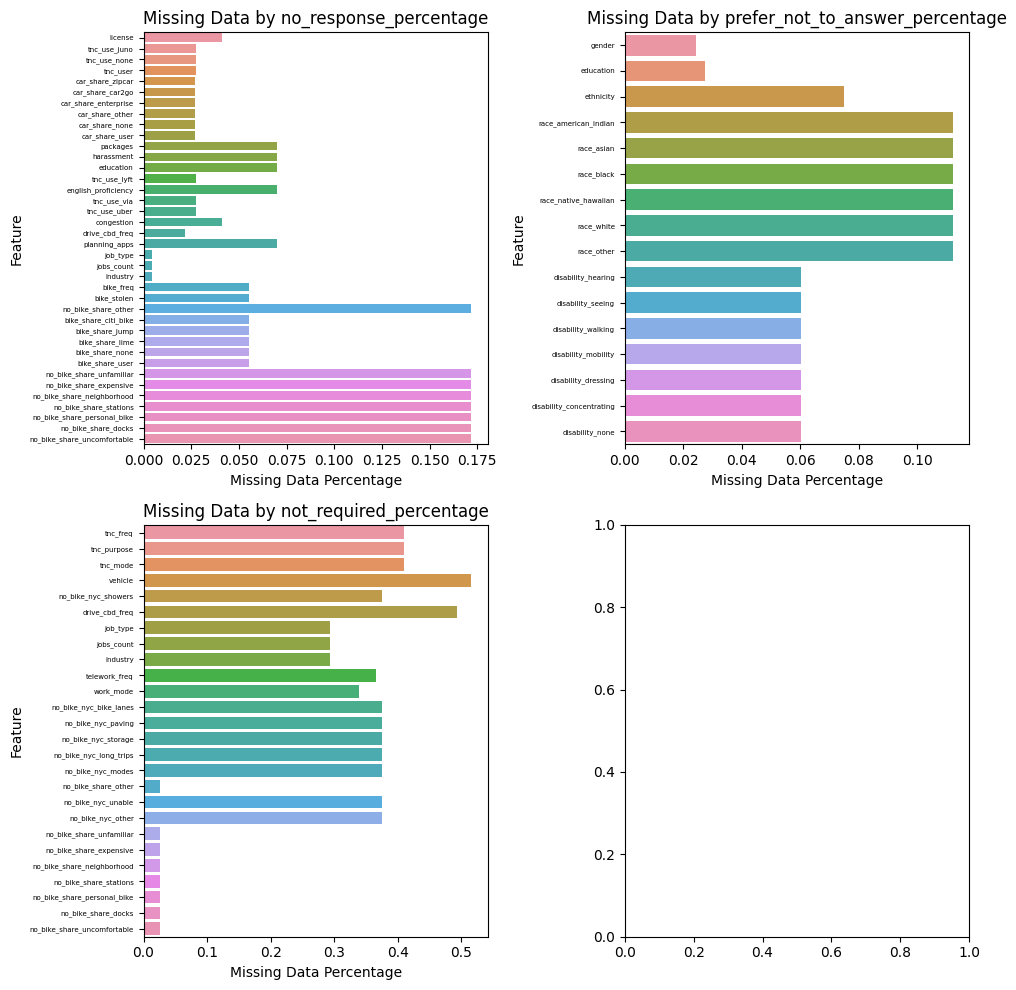

In [18]:
# Generate a visualization of the indirect missing data percentages for each feature
GLAD.plot_indirect_missing(indirect_missing)

The scale update to less that 60% of missing data. Now I will handle the remaining features. 

In [19]:
# Get the list of columns with less than 60% indirect missing values
features_st60_missing = CLD.filter_indirect_missing_columns(indirect_missing, indirect_missing.columns ,0.0, 0.6)

# Display the feature list
features_st60_missing

c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\notebooks\../src/utils\cleaning_data.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_value = data.max(axis=1)
c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\notebooks\../src/utils\cleaning_data.py:89: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_value = data.min(axis=1)


['license',
 'gender',
 'tnc_use_juno',
 'tnc_use_none',
 'tnc_user',
 'tnc_freq',
 'tnc_purpose',
 'tnc_mode',
 'car_share_zipcar',
 'car_share_car2go',
 'car_share_enterprise',
 'car_share_other',
 'car_share_none',
 'car_share_user',
 'packages',
 'harassment',
 'education',
 'tnc_use_lyft',
 'english_proficiency',
 'ethnicity',
 'race_american_indian',
 'race_asian',
 'race_black',
 'race_native_hawaiian',
 'race_white',
 'race_other',
 'disability_hearing',
 'disability_seeing',
 'disability_walking',
 'disability_mobility',
 'disability_dressing',
 'disability_concentrating',
 'tnc_use_via',
 'tnc_use_uber',
 'vehicle',
 'no_bike_nyc_showers',
 'congestion',
 'drive_cbd_freq',
 'planning_apps',
 'job_type',
 'jobs_count',
 'industry',
 'telework_freq',
 'work_mode',
 'bike_freq',
 'bike_stolen',
 'no_bike_nyc_bike_lanes',
 'no_bike_nyc_paving',
 'no_bike_nyc_storage',
 'no_bike_nyc_long_trips',
 'no_bike_nyc_modes',
 'no_bike_share_other',
 'no_bike_nyc_unable',
 'no_bike_nyc_oth

## Seperate Types of Columns
which is: one-hot, numeric and labeled features.

In [20]:
# Seperate the features based on type of data
one_hot_features, numeric_features, labeled_features = CLD.get_features_based_type(data, features_st60_missing)

Number of one-hot encoded features: 48
Samples of one-hot encoded features (sample size=5):


,license,tnc_use_juno,tnc_use_none,tnc_user,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,...,bike_share_none,bike_share_user,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,disability_none
3293,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
461,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
634,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
2168,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
498,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


Number of numeric features: 0
Number of labeled features: 19
Samples of labeled features (sample size=5):


,gender,english_proficiency,packages,vehicle,ethnicity,drive_cbd_freq,tnc_mode,education,tnc_purpose,planning_apps,jobs_count,job_type,industry,bike_freq,harassment,congestion,telework_freq,tnc_freq,work_mode
1762,1,1,4,995,997,995,105,7,2,3,1,1,15,5,1,4,7,4,105
201,1,1,5,1,1,8,995,6,995,8,1,1,11,4,3,4,8,995,105
545,1,1,5,995,1,995,102,2,5,1,1,1,8,5,4,1,2,3,102
1287,1,1,6,995,1,995,1,3,60,2,1,2,10,5,1,4,8,4,105
2080,2,1,3,995,1,995,105,6,1,1,1,1,16,4,4,1,5,6,105


In [21]:
error_numeric_features = ['jobs_count']

# Remove the error features from labeled_features and add them to numeric_features
labeled_features = list(set(labeled_features).symmetric_difference(set(error_numeric_features)))
numeric_features.extend(error_numeric_features)

In [22]:
# Display the information of the numeric features list after updated
CLD.display_info_lists(data,("numeric", numeric_features))

Number of numeric features: 1
Samples of numeric features (sample size=5):


,jobs_count
2974,1
2376,1
1900,1
1694,1
2789,995


## Types of Indirect Missing Data for each Features

In [23]:
# Calculate the indirect missing data percentages for numeric features
search_numeric = GLAD.get_feature_missing(data[numeric_features])

# Calculate the indirect missing values based on the calculated percentages
search_numeric = GLAD.display_indirect_missing(search_numeric)

# Display result
search_numeric.columns.drop('feature_type')

Index(['no_response_percentage', 'not_required_percentage'], dtype='object')

I will handle **not required** missing data type by **constant value which is zero**, and the **no response** missing data type by **impute statistical value**.

In [24]:
# Calculate the indirect missing data percentages for encoded features
search_encoded = GLAD.get_feature_missing(data[one_hot_features])

# Calculate the indirect missing values based on the calculated percentages
search_encoded = GLAD.display_indirect_missing(search_encoded)

# Display result
search_encoded.columns.drop('feature_type')

Index(['no_response_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

I will handle **features that encoded** in nature by **create new column encode for each of the missing data type**.

In [25]:
# Calculate the indirect missing data percentages for labeled features
search_labeled = GLAD.get_feature_missing(data[labeled_features])

# Calculate the indirect missing values based on the calculated percentages
search_labeled = GLAD.display_indirect_missing(search_labeled)

# Display result
search_labeled.columns.drop('feature_type')

Index(['no_response_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

We will handle **labeled data** by **encoding with missing data type** in the _encoding_ process.

## Handle Numeric Data

In [26]:
# Fill numeric columns that have 995 and -9998 indirect missing label by 0 and mode value
CLD.fill_numeric(data, numeric_features, [995, -9998])

Numeric values have been filled successfully.


In [27]:
# Display the counts of uniques value for numeric feature
data[numeric_features].value_counts()

jobs_count
1             2046
0              984
2              231
3               57
6               17
4                8
5                3
dtype: int64

# Handle Encoded Feature

In [28]:
# Define a list of prefixes for the encoded feature names
prefixes = ['license', 'tnc_user', 'tnc_use_', 'bike_', 'no_bike_nyc_', 'bike_share_', 'disability_', 'race_', 'no_bike_share_']

# Group features with the same prefix
encoded_columns_names_dict = CLD.grouping_encoded_features(prefixes, one_hot_features)

# Display result
encoded_columns_names_dict

{'license': ['license'],
 'tnc_user': ['tnc_user'],
 'tnc_use_': ['tnc_use_juno',
  'tnc_use_none',
  'tnc_use_lyft',
  'tnc_use_via',
  'tnc_use_uber'],
 'bike_': ['bike_stolen',
  'bike_share_citi_bike',
  'bike_share_jump',
  'bike_share_lime',
  'bike_share_none',
  'bike_share_user'],
 'no_bike_nyc_': ['no_bike_nyc_showers',
  'no_bike_nyc_bike_lanes',
  'no_bike_nyc_paving',
  'no_bike_nyc_storage',
  'no_bike_nyc_long_trips',
  'no_bike_nyc_modes',
  'no_bike_nyc_unable',
  'no_bike_nyc_other'],
 'bike_share_': ['bike_share_citi_bike',
  'bike_share_jump',
  'bike_share_lime',
  'bike_share_none',
  'bike_share_user'],
 'disability_': ['disability_hearing',
  'disability_seeing',
  'disability_walking',
  'disability_mobility',
  'disability_dressing',
  'disability_concentrating',
  'disability_none'],
 'no_bike_share_': ['no_bike_share_other',
  'no_bike_share_unfamiliar',
  'no_bike_share_expensive',
  'no_bike_share_neighborhood',
  'no_bike_share_stations',
  'no_bike_share

In [29]:
# missing-codes to handle it 
missing_codes = [-9998, 999, 995]

# handle missing-code data with function 
data = CLD.handle_missing_codes_encoded_features(data[features_st60_missing], missing_codes, encoded_columns_names_dict)

c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\notebooks\../src/utils\cleaning_data.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_col_name] = (data[features[0]] == code).astype(int)
c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\notebooks\../src/utils\cleaning_data.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_col_name] = (data[features[0]] == code).astype(int)
c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Cluste

In [30]:
# Update indirect missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the indirect missing value
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

# Display result
direct_missing

'No Missing Data: NAN type'

In [31]:
# Display final shape from this processing
data.shape

(3346, 94)

# Share the Ready Dataset

In [32]:
# Share clean data 
data.to_csv("../data/processed/data.csv", index=False)